# Desafio 1:

In [3]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
imdb = pd.read_csv("https://raw.githubusercontent.com/tiagodeluna/study-notes/master/datascience/datasets/imdb_5000/movie_database.csv")
color_or_bw = imdb.query("color in ['Color', ' Black and White']")

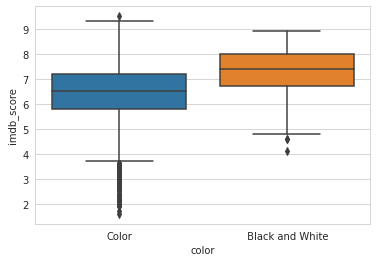

In [5]:
sns.boxplot(x='color', y='imdb_score', data=color_or_bw)

# Desafio 2:

In [19]:
#imdb = imdb.drop_duplicates()
imdb_usa = imdb.drop_duplicates().query("country == 'USA'")
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

# Filtra filme baseado nas variáveis do gráfico
imdb_usa.query("lucro < -190000000 & budget > 250000000").head()["movie_title"]
# Ou, ordenando por lucro de forma crescente:
#imdb_usa.sort_values('lucro').head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

# Desafio 3:

In [26]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
163,Gods of Egypt,-108858926.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
2404,My Big Fat Greek Wedding 2,41573085.0,2016.0
244,The Huntsman: Winter's War,-67047980.0,2016.0
1742,The Boss,34034755.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
154,Kung Fu Panda 3,-1476537.0,2016.0
65,X-Men: Apocalypse,-23014913.0,2016.0
567,The Angry Birds Movie,34225164.0,2016.0


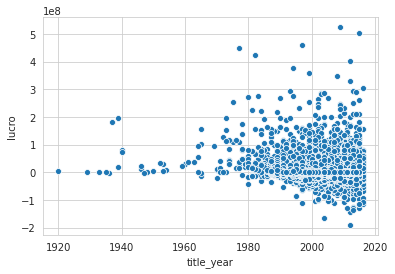

In [21]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data=lucro_year)

# Desafio 4:


In [27]:
pre_war = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending=False).dropna()
pre_war[['movie_title', 'lucro']].head()

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
4157,The Wizard of Oz,19402612.0
4812,The Broadway Melody,2429000.0
4706,Top Hat,2391000.0


# Desafio 5:

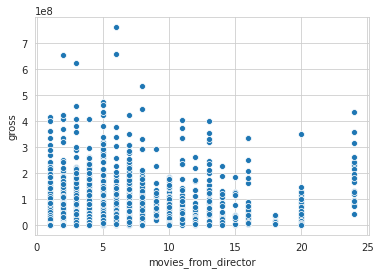

In [30]:
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(
    imdb_usa["director_name"].value_counts(), on="director_name")
gross_director.columns=["gross", "movies_from_director"]
gross_director = gross_director.reset_index()
sns.scatterplot(x="movies_from_director", y="gross", data = gross_director)

In [31]:
gross_director.drop_duplicates('director_name').query('movies_from_director == 18')

,director_name,gross,movies_from_director
1538,Woody Allen,7496522.0,18.0


# Desafio 6:


In [32]:
filmes_depois_de_2000 = imdb_usa.query('title_year >= 2000')
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


# Desafio: interpretar essa correlação.

Em comparação à correlação anterior vista, para os filmes de depois de 2000 a correlação entre gross-budget e budget-lucro aumentou enquanto entre gross-lucro diminuiu, todos com pequenas margens de diferenças.

Olhando para budget-lucro, foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.

# Desafio 7:

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,faturamento,orçamento,lucro,ano
faturamento,1.000000,0.708622,0.770074,0.102319
orçamento,0.708622,1.000000,0.095558,0.059220
lucro,0.770074,0.095558,1.000000,0.028288
ano,0.102319,0.059220,0.028288,1.000000


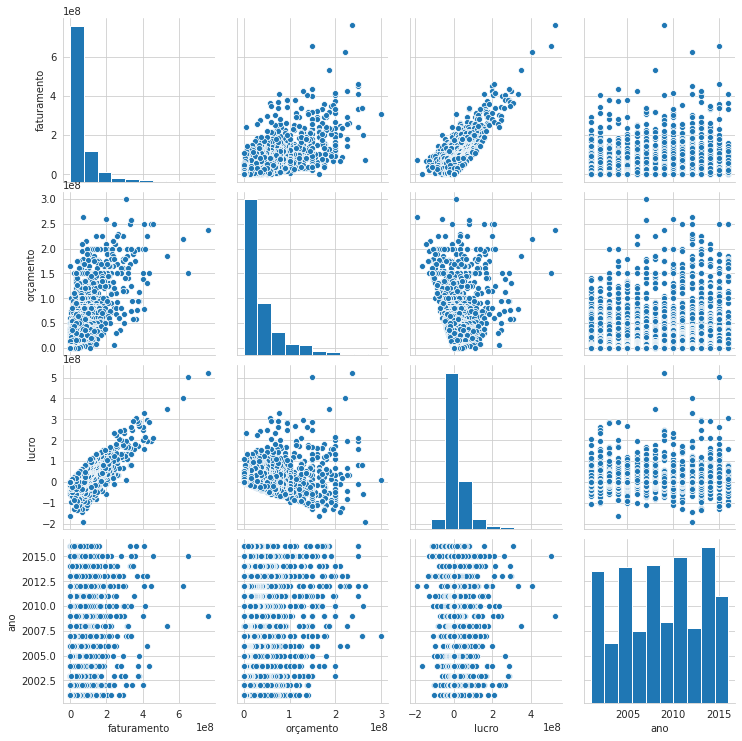

In [34]:
imdb_usa_from_2000 = imdb_usa.query("title_year > 2000")
imdb_usa_from_2000.rename(columns={"gross": "faturamento", "budget": "orçamento", "title_year": "ano"}, inplace=True)
sns.pairplot(data = imdb_usa_from_2000[["faturamento", "orçamento", "lucro", "ano"]])
imdb_usa_from_2000[["faturamento", "orçamento", "lucro", "ano"]].corr()

**Análise dos dados:**
* A relação *faturamento-lucro* sugere que, na maior parte dos casos, na medida em que um cresce o outro também cresce, o que é reforçado pelo gráfico.
* A relaçao do *ano* com as outras features é muito fraca, sugerindo que não há influência direta entre o ano com as outras features. Os gráficos mostram que independente do ano, há uma variação muito grande de *orçamento*, *faturamento* e *lucro*. 

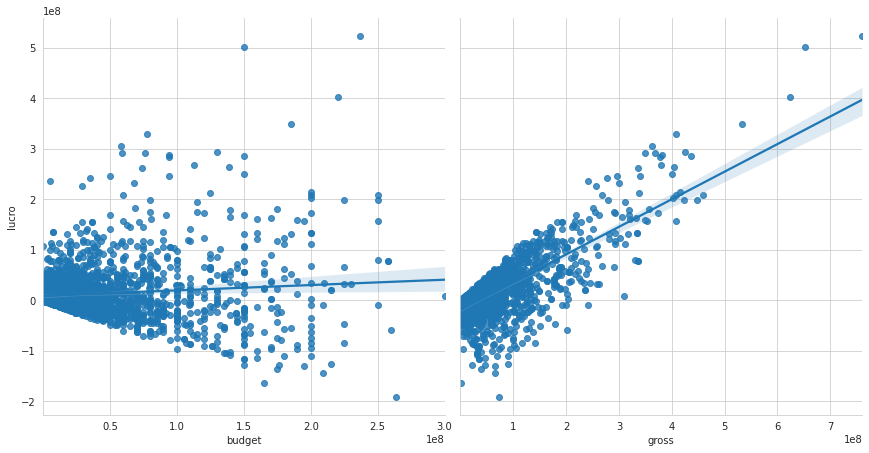

In [36]:
sns.pairplot(imdb_usa.query("title_year > 2000"), y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

# Desafio 8:

In [37]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.000000,0.645673,0.258948
budget,0.645673,1.000000,0.078936
imdb_score,0.258948,0.078936,1.000000


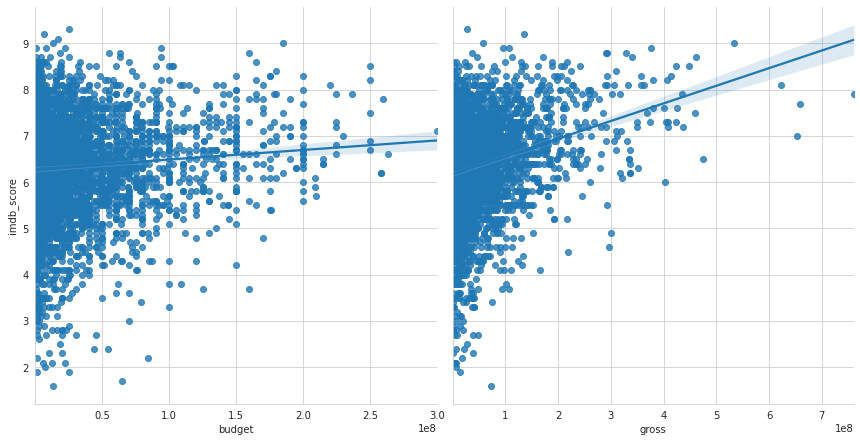

In [38]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')

# Desafio 9:

O desafio nove era de interpretação, compartilhe sua solução com outros alunos e debata as soluções.